<img width="40%" style="margin:auto" src="https://kpi.ua/files/images-page/kpi-big-logo.png" >

<h1 align="center"><b>Курсова робота</b></h1>
<h3 align="center"> <em><b>Аналіз даних за допомогою Python та бібліотеки Pandas</b></em> </h3>

---

<p style="text-align:right"><b>Виконав:</b> </br> Студент групи ФІ-21 Беркута Володимир, НН ФТІ</p>

<h2 align="center">Частина №1</h2>
<p>Мета: Вивчення основних принципів роботи та використання програмних
компонентів Anaconda. Інсталяція. Дослідження можливостей IPython Notebook.</p>
<h3 align="center">Вступ</h3>
<p>Ipython Notebook — це середовище розробки, що дає можливості для
інтерактивної та ітеративної розробки проектів, пов’язаних з Data Science.
Notebook інтегрує код та результати його виконання в один файл разом з
графіками, текстом, математичними виразами та іншими можливими видами
представлення інформації.</br></br>
JupyterLab - це новітнє інтерактивне веб-середовище для розробки блокнотів, коду та даних. Його гнучкий інтерфейс дозволяє користувачам налаштовувати та організовувати робочі процеси в науці про дані, наукових обчисленнях, комп'ютерній журналістиці та машинному навчанні. Модульна конструкція дозволяє розширювати та збагачувати функціональність.</br></br>
Блокнот (notebook) представляє код і результат його виведення в єдиному документі, який об’єднує візуалізацію, розмічений текст, математичні рівняння та інші мультимедійні дані. Цей інтуїтивно зрозумілий робочий процес сприяє ітеративній і швидкій розробці, що робить ноутбуки все більш популярним вибором для подання даних і їх аналізу. Notebook інтегрує код та результати його виконання в один файл разом з графіками, текстом, математичними виразами та іншими можливими видами представлення інформації.</p>
<h3 align="center">Підготовка до роботи</h3>
<ol>
    <li>Для початку варто завантажити <a href="https://www.anaconda.com/download">Anaconda Distribution</a></li>
    <li>Після завантаження запускаємо <b>Anaconda Poweshell Prompt</b></li>
    <li>За допомогою команди <code>cd Папка1\папка2</code> вибираємо необхідну директорію, а командою <code>[потрібний диск]:</code> змніюємо диск</li>
    <li>Далі створюємо віртуальне середовище командою <code>conda --prefix=[Назва вірутального середовища] python=3.11.5</code></li>
    <li><code>conda activate</code> - активуємо середовище</li>
    <li>Інсталюємо JupyterLab <code>conda install jupyterlab</code></li>
    <li>Командою <code>jupyter lab</code> запускаємо JupyterLab</li>
</ol>
<h3 align="center">Можливості Jupyter Notebook</h3>
<ul>
    <li>Редагувати Python код в браузері, з підсвічуванням синтаксису, автовідступами і автодоповненням</li>
    <li>Запускати код в браузері</li>
    <li>Відображати результати обчислень з медіа представленням(схеми, графіки)</li>
    <li>Працювати з мовою розмітки Markdown і LaTeX</li>
</ul>

Приклад роботи з LaTeX
$$\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

<h2 align="center">Частина №2</h2>
<p>Мета: Отримати досвід використання основних засобів аналізу та візуалізації даних у середовищі IPython Notebook на модельних наборах даних.</br></br>
В роботі використовується публічний набір даних <a href="https://www.kaggle.com/datasets/neuromusic/avocado-prices"><em><b>Avocado Prices</b></em></a>.</p>

#### Завдання №1 
Дане завдання з частини №2 було виконане під час підготовки до роботи

##### Імпортуємо необхідні бібліотеки

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

%matplotlib inline

sns.set_style("darkgrid")

warnings.filterwarnings('ignore')
print("Завантаження необхідних бібліотек завершено")

Завантаження необхідних бібліотек завершено


#### Завдання №2
Відкриваємо dataset та виводимо перших 5 рядків

In [2]:
df = pd.read_csv("dataset/avocado.csv", index_col="Unnamed: 0")
df = df.sort_values(by=['Date'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


#### Завдання №3
Перевіряємо на наявність порожніх значень

In [3]:
df.isnull().values.any()

False

#### Завдання №4
Представлення набору даних у матричному вигляді. Відображення 10 елементів для 4-ох ознак Виділення зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів.

In [4]:
df_matrix_foramt = df.pivot(columns=["region", "type"], index="Date", values="AveragePrice").head(10).sort_values(by=["region"], axis=1)
display(df_matrix_foramt.style.highlight_max(axis=0, props="background-color:green").\
format('{:.2f}').\
highlight_min(axis=0, props="background-color:red").\
set_table_styles([{'selector': 'th.col_heading', 'props': 'text-align: center;'}], overwrite=False))

##### Математичне сподівання та дисперсія
Математичне сподівання обраховується за наступною формулою:
$$\overline{X} = \frac{1}{n}\sum_{i=1}^{n} X_i$$
А дисперсія за цією:
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{X_i^2} - \overline{X}^2}$$

In [5]:
X_ = lambda x: x.sum()/len(x)
disp = lambda x: np.sqrt(sum(x**2)/len(x) - X_(x)**2)
print("Різниця обчисленого матемитичного сподівання за допомгою функції Pandas та формулою:",
      round(abs(X_(df["AveragePrice"])-df["AveragePrice"].mean()), 3))
print("Різниця обчисленої дисперсії за допомгою функції Pandas та формулою:",
      round(abs(disp(df["AveragePrice"])-df["AveragePrice"].std()), 3))

Різниця обчисленого матемитичного сподівання за допомгою функції Pandas та формулою: 0.0
Різниця обчисленої дисперсії за допомгою функції Pandas та формулою: 0.0


##### Стандартизування даних

In [6]:
def standartization(df):
    dataframe = df.copy()
    
    df_for_stand_org = dataframe[dataframe["type"]=="organic"].select_dtypes(include='float64')
    df_for_stand_org  = ( df_for_stand_org - df_for_stand_org.mean() )/ df_for_stand_org.std()
    
    df_for_stand_conv = dataframe[dataframe["type"]=="conventional"].select_dtypes(include='float64')
    df_for_stand_conv  = ( df_for_stand_conv - df_for_stand_conv.mean() )/ df_for_stand_conv.std()
    
    standartization_df = dataframe
    
    standartization_df.loc[standartization_df["type"]=="organic", list(df_for_stand_org.columns)] = df_for_stand_org
    standartization_df.loc[standartization_df["type"]=="conventional", list(df_for_stand_org.columns)] = df_for_stand_conv
    return standartization_df


standartization(df[df["region"]=="TotalUS"])

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,-0.815603,-0.394038,0.140141,0.850200,-0.173310,-1.488867,-1.545307,-1.191652,-1.019055,conventional,2015,TotalUS
51,2015-01-04,-0.424313,-1.172483,1.595150,-1.187734,-0.265342,-1.241281,-1.058389,-1.129569,-0.344028,organic,2015,TotalUS
50,2015-01-11,-0.621586,-0.985303,2.303270,-0.612993,-0.403453,-1.330357,-1.094194,-1.311193,-0.344028,organic,2015,TotalUS
50,2015-01-11,-0.471011,-0.763554,-0.188716,0.220000,-0.121089,-1.483014,-1.455734,-1.371772,-1.046200,conventional,2015,TotalUS
49,2015-01-18,-0.621586,-0.841192,1.990425,0.045691,-0.354799,-1.297391,-1.115937,-1.156335,-0.344028,organic,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2018-03-11,-0.011554,1.097493,0.841265,-0.362563,-0.490414,1.810295,1.987787,1.189334,1.370344,conventional,2018,TotalUS
1,2018-03-18,-0.029766,2.341421,0.420903,1.770658,-1.115006,1.980740,2.086131,0.806406,2.214936,organic,2018,TotalUS
1,2018-03-18,-0.241283,1.250598,0.686744,-0.234344,-0.634891,2.152272,2.132585,1.962947,1.361635,conventional,2018,TotalUS
0,2018-03-25,0.019552,1.958467,-0.514858,0.447878,-1.108654,2.106790,2.370955,0.477257,1.828062,organic,2018,TotalUS


#### Завдання №5
Візуалізація даних

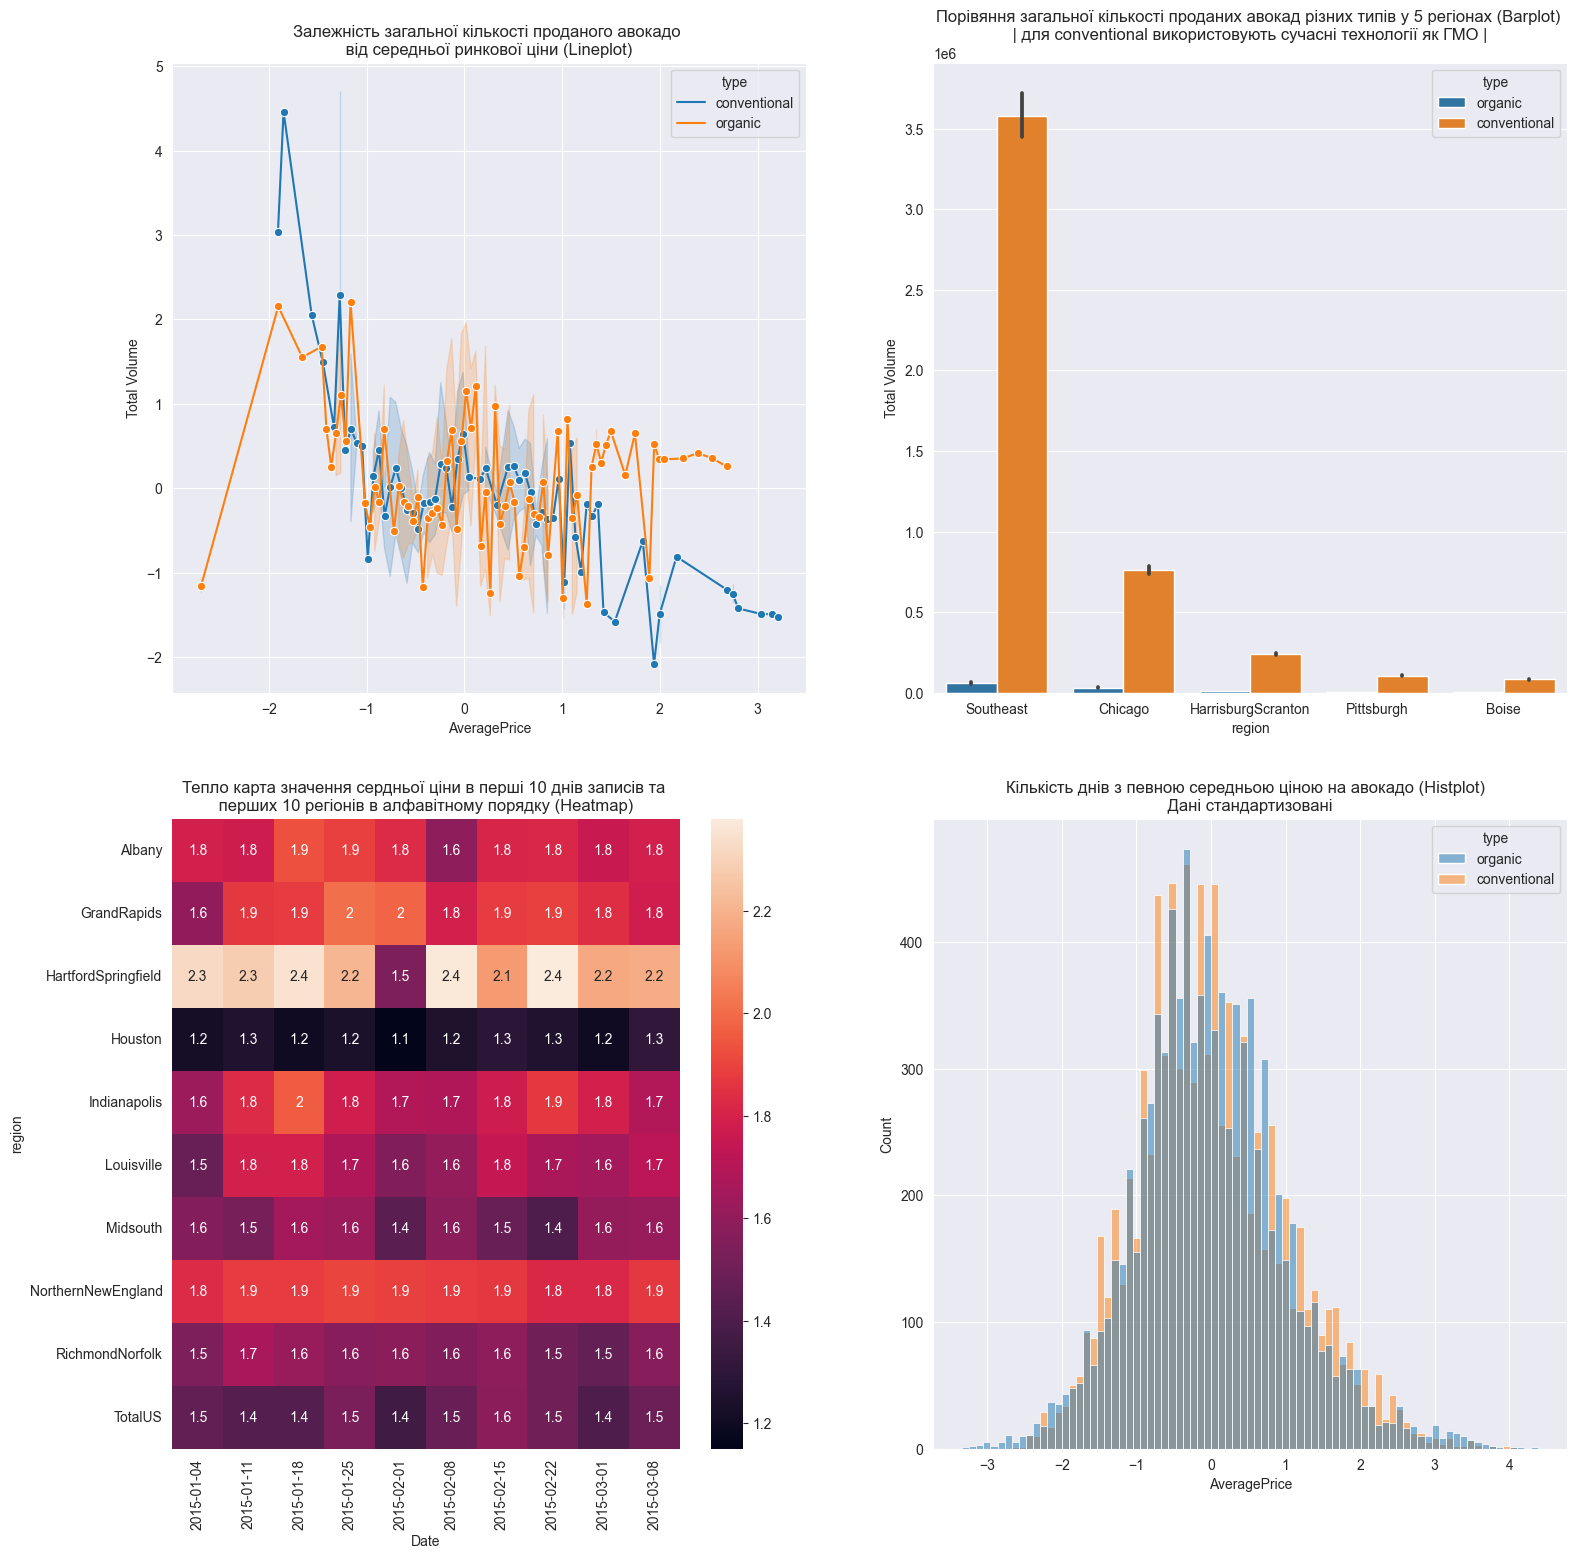

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

sns.lineplot(
    ax = axes[0, 0], data = standartization(df[df["region"]=="TotalUS"]),
    x = "AveragePrice", y = "Total Volume", hue = "type",
    marker = "o"
)
axes[0, 0].set_title("Залежність загальної кількості проданого авокадо \n від середньої ринкової ціни (Lineplot) ")

sns.barplot(
    ax = axes[0, 1], data = df[df["region"].isin(list(df["region"].head()))], x = "region", y = "Total Volume",
    hue = "type"
)
axes[0, 1].set_title("Порівяння загальної кількості проданих авокад різних типів у 5 регіонах (Barplot) \n | для conventional використовують сучасні технології як ГМО | ")

sns.heatmap(
    ax = axes[1, 0], data = df.loc[(df["type"]=="organic")&(df["region"].isin(list(set(list(df["region"])))[:10]))&(df["Date"].isin(sorted(list(set(list(df["Date"]))))[:10]))].pivot(index="region", columns="Date", values="AveragePrice"),
    annot = True
)
axes[1, 0].set_title("Тепло карта значення сердньої ціни в перші 10 днів записів та \n перших 10 регіонів в алфавітному порядку (Heatmap) ")

sns.histplot(
    ax = axes[1, 1], data = standartization(df),
    x = "AveragePrice", stat = "count", hue = "type"
)
axes[1, 1].set_title("Кількість днів з певною середньою ціною на авокадо (Histplot)  \n Дані стандартизовані ")
display()

#### Завдання №6
Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього
значення кожної лінії.

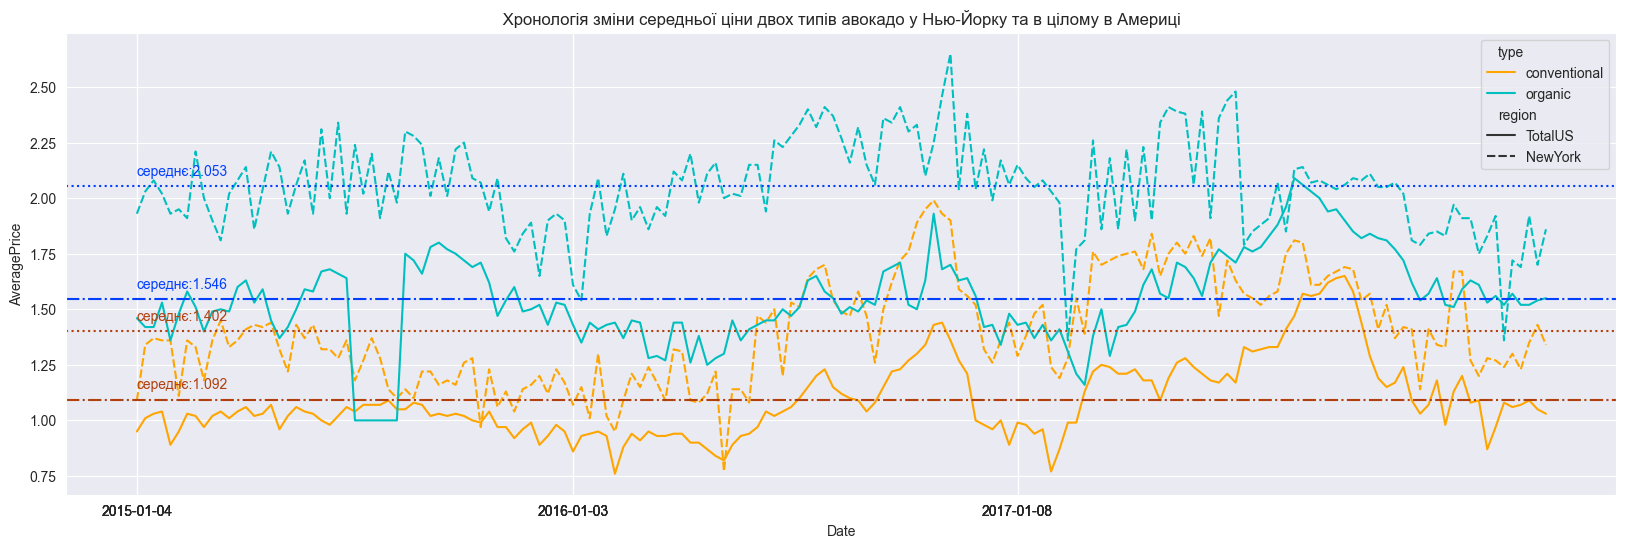

In [8]:
df_for_4_lines = df.loc[df["region"].isin(["TotalUS", "NewYork"])][["Date", "AveragePrice", "type", "region"]]

plt.figure(figsize=(20,6))

g = sns.lineplot(data=df_for_4_lines, 
                 x="Date", 
                 y="AveragePrice", 
                 hue="type", 
                 palette=["orange", "c"], 
                 style="region",
                 ci=None)
g.set_xticks(df_for_4_lines.loc[df_for_4_lines.index.values==51]["Date"].values)

for i in set(df_for_4_lines["type"].values):
    for j in set(df_for_4_lines["region"].values):
        
        line_color = sns.color_palette("bright")[0] if i=="organic" else sns.color_palette("dark")[1]
        line_stl = "-." if j=="TotalUS" else ":"
        
        y_mean = df_for_4_lines[(df_for_4_lines["type"]==i)&(df_for_4_lines["region"]==j)]["AveragePrice"].mean()
        
        g.axhline(y_mean, ls=line_stl, color=line_color)
        g.text(0, y_mean+.05, f"середнє:{round(y_mean, 3)}", color=line_color)
        pass
g.set_title(" Хронологія зміни середньої ціни двох типів авокадо у Нью-Йорку та в цілому в Америці ")
display()

Візуалізації багатовимірних даних з кількістю ознак
більше двох обов’язково необхідно за допомогою subplot збудувати більше 9 графіків за
допомогою комбінування різних ознак.

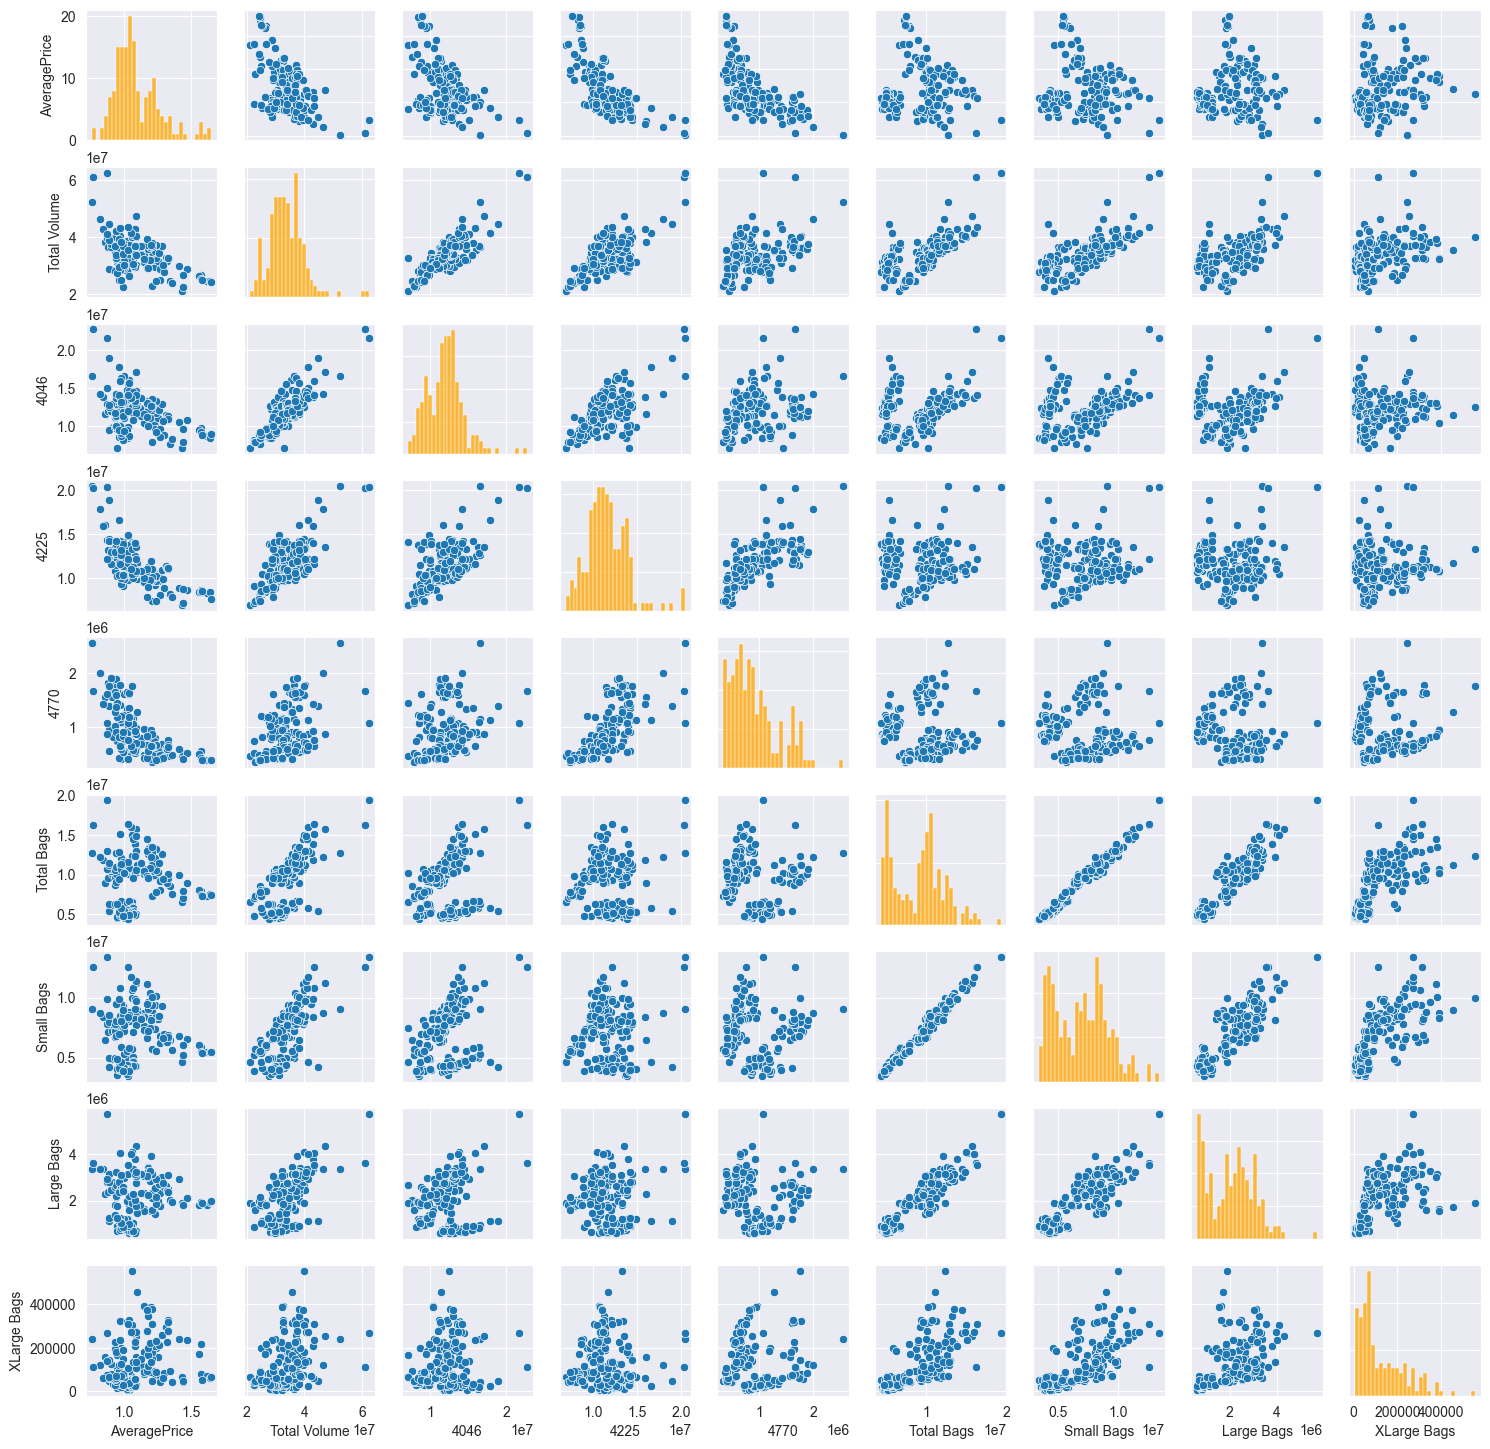

In [45]:
featers = df.drop(["Date", "type", "year", "region"], axis=1).columns.values

plot_9_df = df[(df["region"]=="TotalUS")&(df["type"]=="conventional")]
fig, axes = plt.subplots(featers.shape[0], featers.shape[0], figsize=(18, 18))#, sharex="col", sharey="row")

for i in range(featers.shape[0]):
    for j in range(featers.shape[0]):
        if i==j:
            sns.histplot(data=plot_9_df, 
                         ax=axes[i, i], 
                         x=featers[i], 
                         color="orange", 
                         bins=30)
            
        else: 
            sns.scatterplot(data=plot_9_df,
                            ax=axes[i, j],
                            x=featers[j], 
                            y=featers[i])


for i in range(featers.shape[0]):
    for j in range(featers.shape[0]):
        
        if j!=0:
            axes[i, j].set_yticklabels([])
            axes[i, j].set_ylabel('')
            
        if i!=featers.shape[0]-1:
            axes[i, j].set_xticklabels([])
            axes[i, j].set_xlabel('')

axes[0, 0].set_ylabel("AveragePrice")
display()

#### Завдання №7
Вирахувати коефіцієнт пірсона для кожної пари ознак.
Взяти третю ознаку за вісь X та збудувати relplot для двох ознак, що мають найбільшу
кореляцію за допомогою бібліотеки seaborn.

In [10]:
pre_df_corr = df.drop(["year"], axis=1)
pre_df_corr = pre_df_corr.loc[(pre_df_corr["region"]=="TotalUS")&(pre_df_corr["type"]=="organic")]
df_corr = pre_df_corr.drop(["Date", "region", "type"], axis=1).corr(method="pearson")
val = df_corr.values
val = val.reshape(val.size)
max_value = sorted(set(val))[:-1:][:-2:-1]

def highlights_2_max(s):
    return "background-color: yellow;" if (s in max_value) else None

df_corr.style.map(highlights_2_max)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,0.024432,-0.306326,-0.321156,-0.393561,0.178775,0.318327,-0.252887,0.187186
Total Volume,0.024432,1.000000,-0.032949,0.585107,-0.215274,0.930180,0.864594,0.667414,0.347537
4046,-0.306326,-0.032949,1.000000,0.397019,0.215481,-0.338641,-0.328086,-0.209532,-0.238402
4225,-0.321156,0.585107,0.397019,1.000000,0.314611,0.277303,0.183909,0.384068,-0.122565
4770,-0.393561,-0.215274,0.215481,0.314611,1.000000,-0.374818,-0.443166,-0.031409,-0.363915
Total Bags,0.178775,0.930180,-0.338641,0.277303,-0.374818,1.000000,0.953643,0.656958,0.460310
Small Bags,0.318327,0.864594,-0.328086,0.183909,-0.443166,0.953643,1.000000,0.399616,0.534859
Large Bags,-0.252887,0.667414,-0.209532,0.384068,-0.031409,0.656958,0.399616,1.000000,0.061685
XLarge Bags,0.187186,0.347537,-0.238402,-0.122565,-0.363915,0.460310,0.534859,0.061685,1.000000


Отже маємо найбільше значення для таких ознак "Small Bags" та "Total Bags".

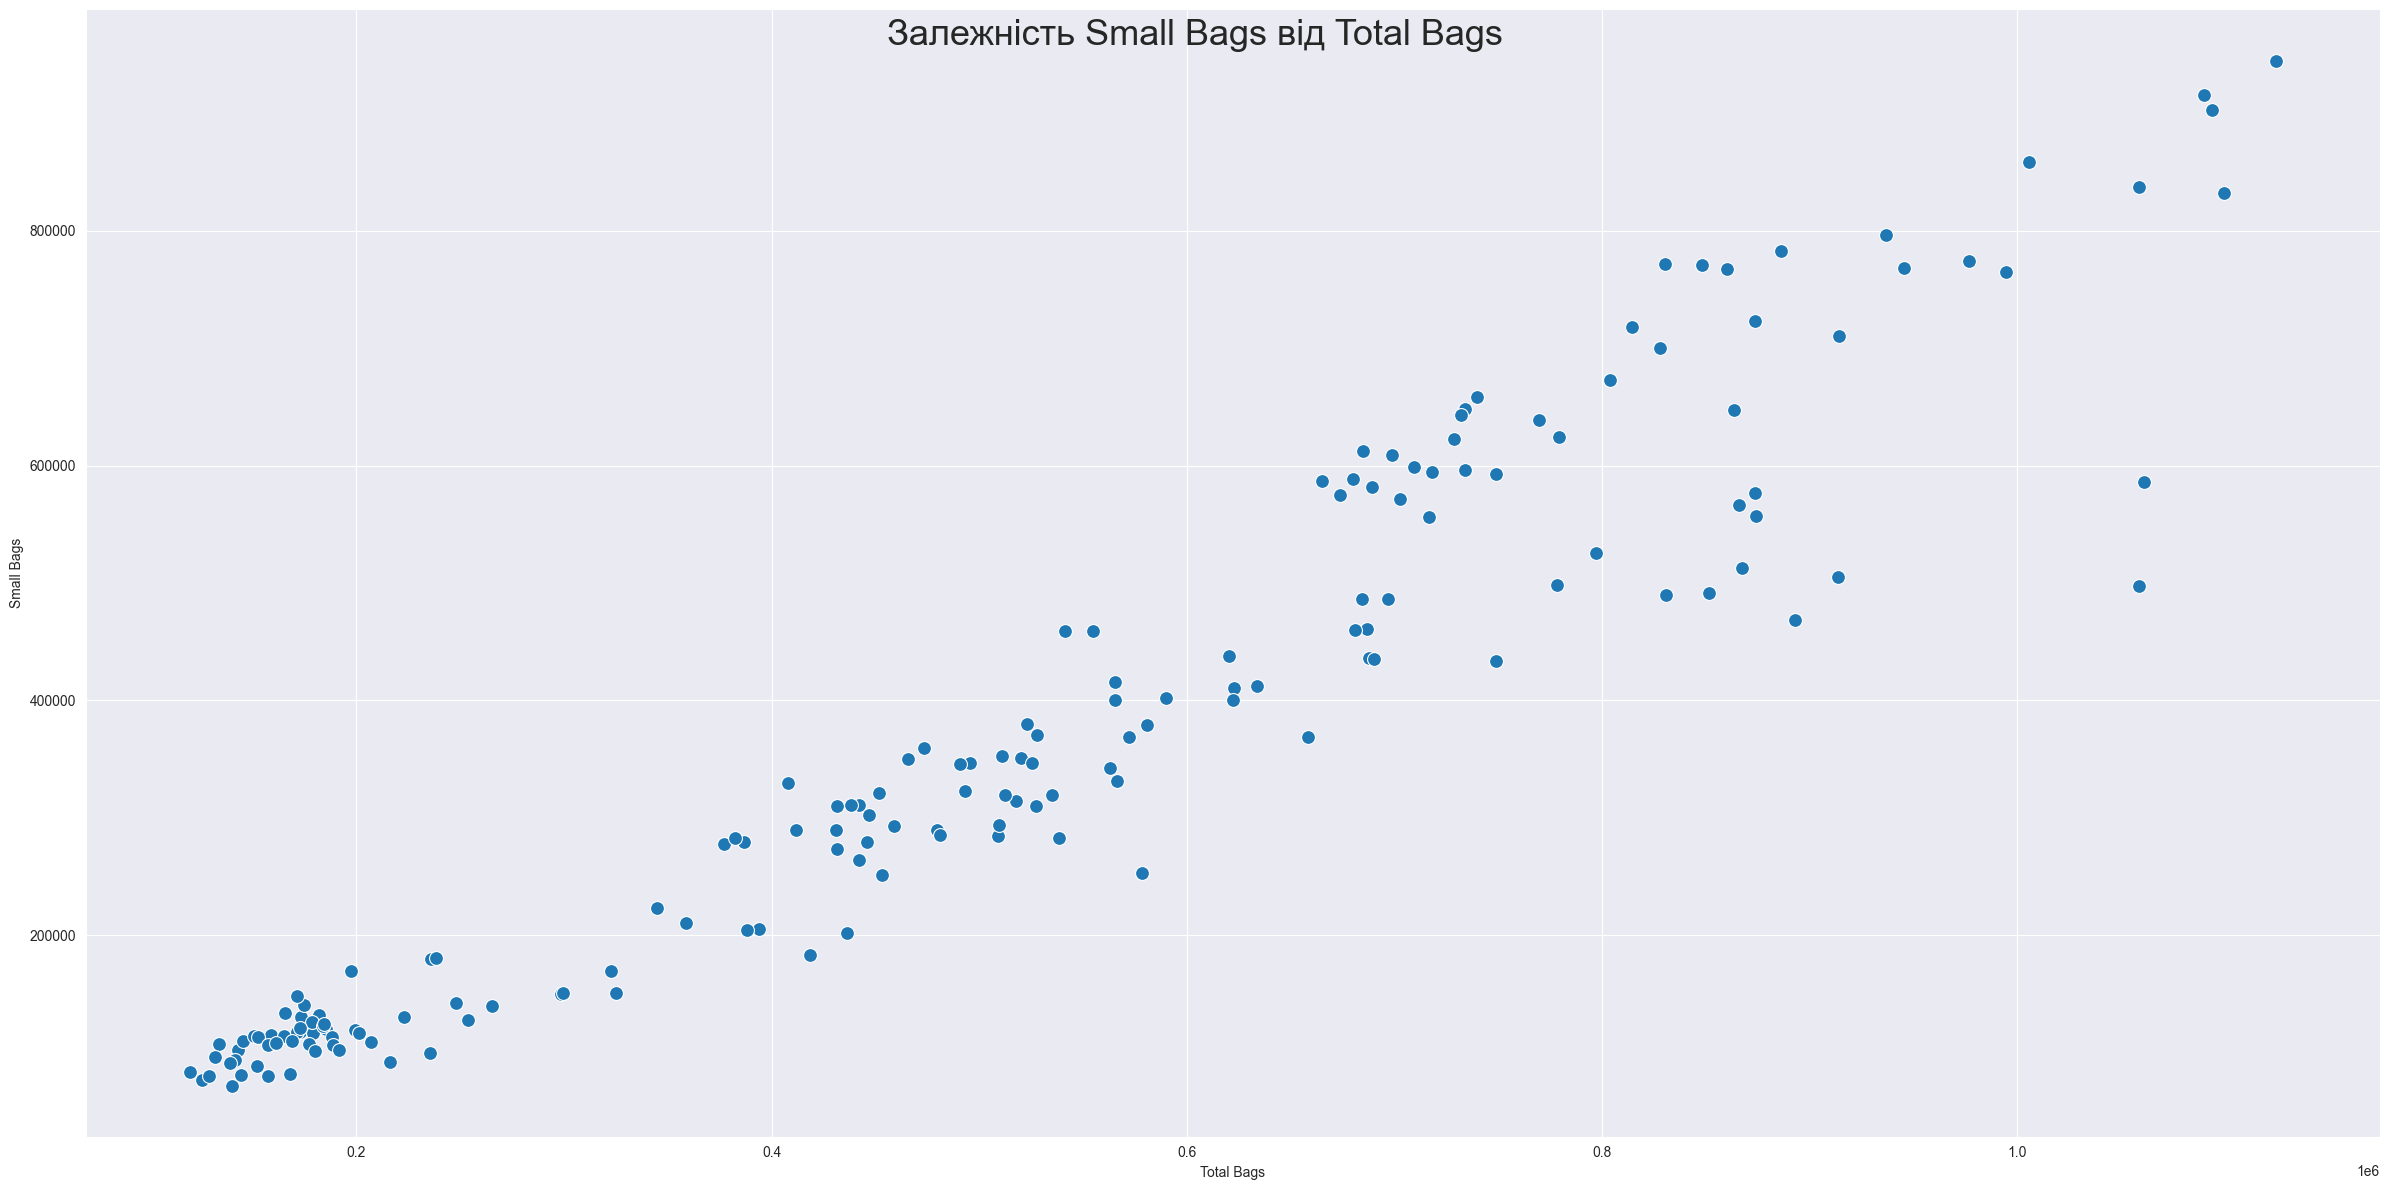

In [11]:
g = sns.relplot(data=df.loc[(df["region"]=="TotalUS")&(df["type"]=="organic")], 
                x="Total Bags", 
                y="Small Bags", 
                height=12, 
                aspect=2, s=100,
                kind="scatter")

g.fig.suptitle(" Залежність Small Bags від Total Bags ", fontsize=26)
display()

#### Завдання №8
Оскільки цей набір даних не має порожніх значень, одже процедури заповнення порожніх данних не було

#### Завдання №9
Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10%
для обох. Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid
для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x.

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,0.024432,-0.306326,-0.321156,-0.393561,0.178775,0.318327,-0.252887,0.187186
Total Volume,0.024432,1.000000,-0.032949,0.585107,-0.215274,0.930180,0.864594,0.667414,0.347537
4046,-0.306326,-0.032949,1.000000,0.397019,0.215481,-0.338641,-0.328086,-0.209532,-0.238402
4225,-0.321156,0.585107,0.397019,1.000000,0.314611,0.277303,0.183909,0.384068,-0.122565
4770,-0.393561,-0.215274,0.215481,0.314611,1.000000,-0.374818,-0.443166,-0.031409,-0.363915
Total Bags,0.178775,0.930180,-0.338641,0.277303,-0.374818,1.000000,0.953643,0.656958,0.460310
Small Bags,0.318327,0.864594,-0.328086,0.183909,-0.443166,0.953643,1.000000,0.399616,0.534859
Large Bags,-0.252887,0.667414,-0.209532,0.384068,-0.031409,0.656958,0.399616,1.000000,0.061685
XLarge Bags,0.187186,0.347537,-0.238402,-0.122565,-0.363915,0.460310,0.534859,0.061685,1.000000


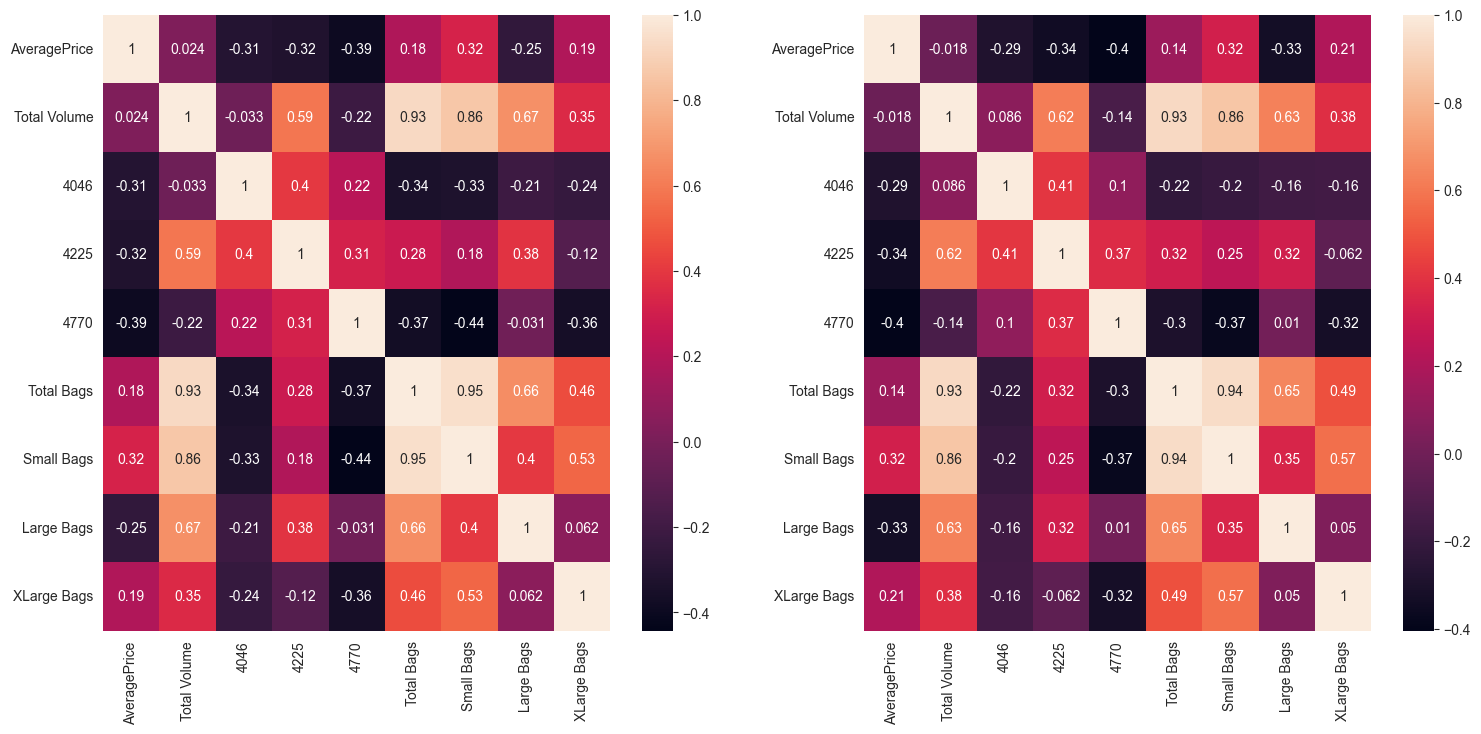

In [12]:
df_with_10 = pre_df_corr.drop(["region", "type"], axis=1)
df_without_10 = df_with_10.iloc[np.random.choice(df_with_10.shape[0], round(df_with_10.shape[0]*.9))]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(data=df_with_10.drop(["Date"], axis=1).corr(method="pearson"), ax=axes[0], annot=True)
sns.heatmap(data=df_without_10.drop(["Date"], axis=1).corr(method="pearson"), ax=axes[1], annot=True)
display()
df_with_10.drop(["Date"], axis=1).corr(method="pearson")

Візьмемо за третю ознаку "Date"

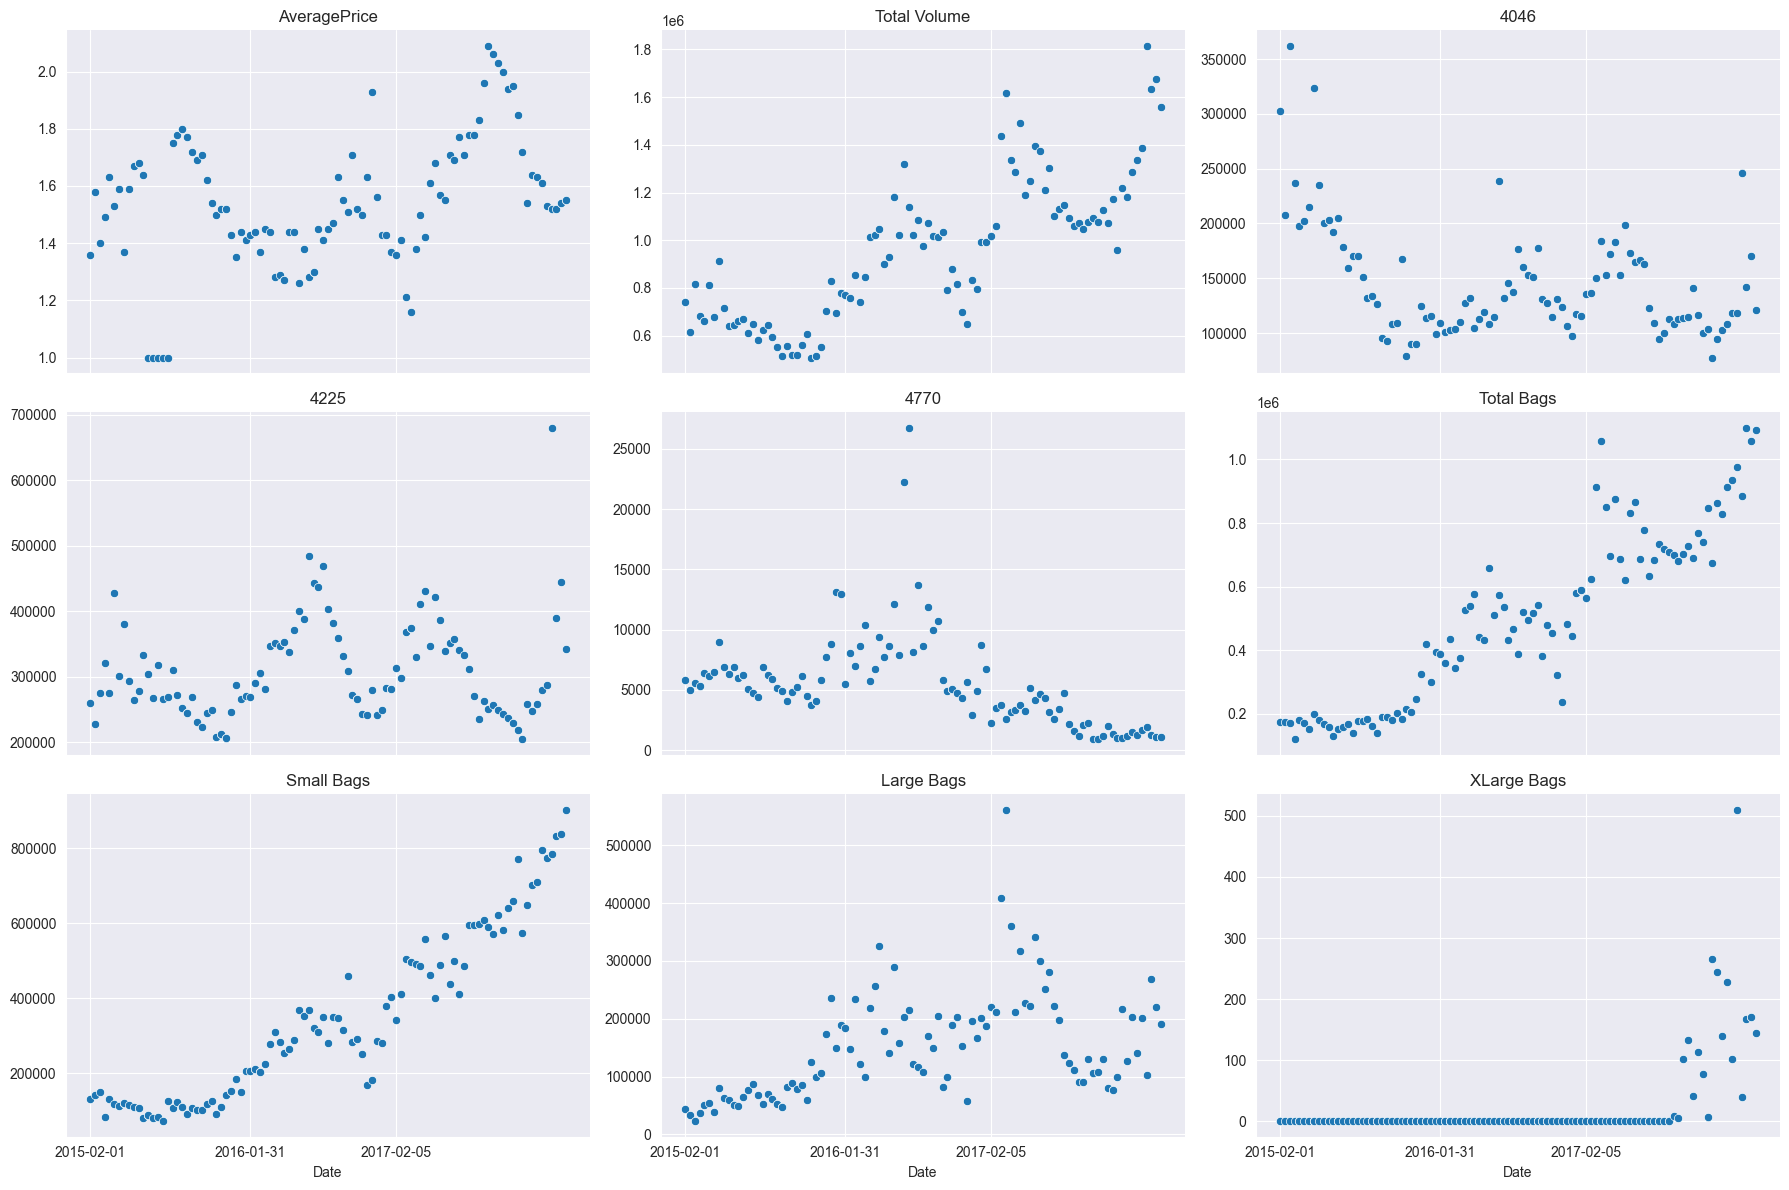

In [13]:
df_for_random_drop = df.loc[(df["region"]=="Atlanta")&(df["type"]=="organic")]
df_without_10 = df_without_10.sort_values(by="Date")
check = np.sqrt(df_without_10.columns.shape[0]-1)

if check == int(check):
    check = int(check)
else: 
    check = int(check)+1


g = sns.FacetGrid(pd.DataFrame(df_without_10.drop("Date", axis=1).columns), 
                  col=0, col_wrap=check, sharey=False, height=4, aspect=1.5)

for ax, yvar in zip(g.axes, df_without_10.drop("Date", axis=1).columns.values):
    sns.scatterplot(data=df_without_10, x="Date", y=yvar, ax=ax)
    ax.set_xticks(df_without_10.loc[df_without_10.index.values==47]["Date"].values)
    ax.set_title(yvar)
    ax.set_ylabel("")
g.tight_layout()
display()

<h2 align="center">Частина №3</h2>
<p>Додаткові завданняа</p>

#### Завдання №1/№4
Збудувати регресійні моделі прогнозування однієї ознаки на основі іншої. Для цього візьміть
дві ознаки, що мають найбільшу кореляцію. Необхідно протестувати такі регресійні модел:
лінійна регресія, регресія випадковоаго дерева, багатошаровий перцептрон; 
Візуалізувати результуючу регресійну функцію та результат 
прогнозування за допомогою matplotlib та seaborn

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree

print("Завантаження додаткових бібліотек завершено")

Завантаження додаткових бібліотек завершено


Підготовка даних

In [15]:
df_for_models = standartization(df[df["region"]=="TotalUS"])

X = df_for_models["Total Bags"].to_numpy().reshape(-1, 1)
Y = df_for_models["Small Bags"].to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Підготовка даних завершена")

Підготовка даних завершена


Навчання та візуалізація моделей

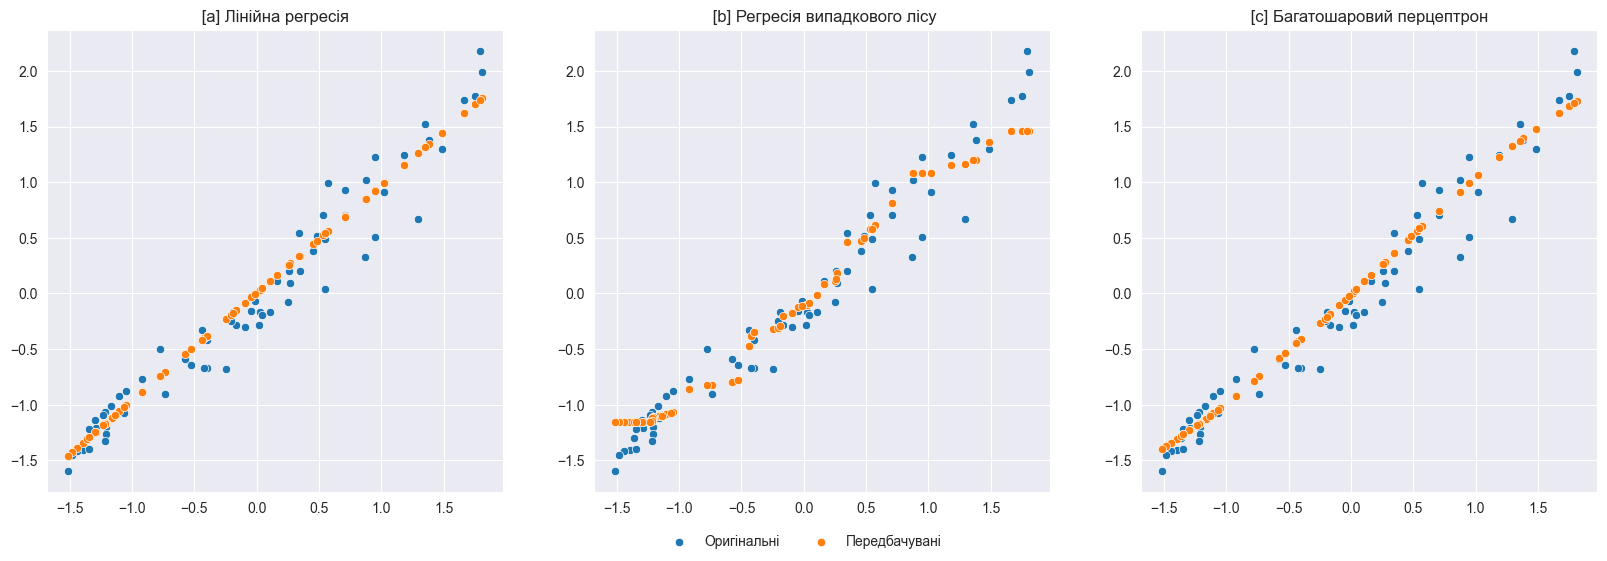

In [16]:
# (a) Лінійна регресія
line_model = LinearRegression()
line_model.fit(x_train, y_train)
line_y_pred = line_model.predict(x_test)

# (b) Регресія випадкового лісу
forest_model = RandomForestRegressor(n_estimators=100, max_depth=3)
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)

# (c) Багатошаровий перцептрон
perc_model = MLPRegressor()
perc_model.fit(x_train, y_train)
perc_y_pred = perc_model.predict(x_test)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

lt = sns.scatterplot(x=x_test.reshape(x_test.shape[0]), y=y_test.reshape(y_test.shape[0]), ax=axs[0], label="Оригінальні")
lp = sns.scatterplot(x=x_test.reshape(x_test.shape[0]), y=line_y_pred.reshape(line_y_pred.shape[0]), ax=axs[0], label="Передбачуванні")
axs[0].set_title(" [a] Лінійна регресія ")

ft = sns.scatterplot(x=x_test.reshape(x_test.shape[0]), y=y_test.reshape(y_test.shape[0]), ax=axs[1], label="Оригінальні")
fp = sns.scatterplot(x=x_test.reshape(x_test.shape[0]), y=forest_y_pred.reshape(forest_y_pred.shape[0]), ax=axs[1], label="Передбачуванні")
axs[1].set_title(" [b] Регресія випадкового лісу")

pt = sns.scatterplot(x=x_test.reshape(x_test.shape[0]), y=y_test.reshape(y_test.shape[0]), ax=axs[2], label="Оригінальні")
pp = sns.scatterplot(x=x_test.reshape(x_test.shape[0]), y=perc_y_pred.reshape(perc_y_pred.shape[0]), ax=axs[2], label="Передбачуванні")
axs[2].set_title(" [c] Багатошаровий перцептрон ")


axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
axs[2].legend().set_visible(False)
fig.legend(["Оригінальні", "Передбачувані"], loc = 'lower center', ncol=2, frameon=False)

display()

#### Завдання №2/№3
##### Вирахувати точність прогнозування та вибрати модель з найкращим результатом

In [79]:
print(f"Для лінійної регресії: \
\n\tСередня квадратична похибка: {round(mean_squared_error(y_test, line_y_pred), 5)} \
\nДля регресії випадкового дерева: \
\n\tСередня квадратична похибка: {round(mean_squared_error(y_test, forest_y_pred), 5)} \
\nДля багатошаровго перецептрона: \
\n\tСередня квадратична похибка: {round(mean_squared_error(y_test, perc_y_pred), 5)}")

Для лінійної регресії: 
	Середня квадратична похибка: 0.04433 
Для регресії випадкового дерева: 
	Середня квадратична похибка: 0.06196 
Для багатошаровго перецептрона: 
	Середня квадратична похибка: 0.04647


##### **Висновок**: найркщий результат має лінійна регресія (Linear Regression)

#### Завдання №5
Піднести до квадрату ознаку, що використовується в якості предиктора для регресійної
моделі та використати її квадрат ознаки як другу ознаку

In [80]:
X_into_2 = np.power(X, 2)

help_df = pd.concat([pd.Series(X.reshape(X.shape[0])), pd.Series(X_into_2.reshape(X_into_2.shape[0]))], axis=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(help_df, Y, test_size=0.2, random_state=42)
print("Підготовка даних для наступного завдання завершена")

Підготовка даних для наступного завдання завершена


In [81]:
new_line_model = LinearRegression()
new_line_model.fit(x2_train, y2_train)
new_line_y_pred = new_line_model.predict(x2_test)

#### Завдання №6/№7
Протестувати набір регресійних моделей з двома предикторами. Побудувати точності та
графіки для обох ознак. Порівняти на графіках результати прогнозування з однією та двома
ознаками взявши за x початкову ознаку. Для цього використайте matplotlib та seaborn.

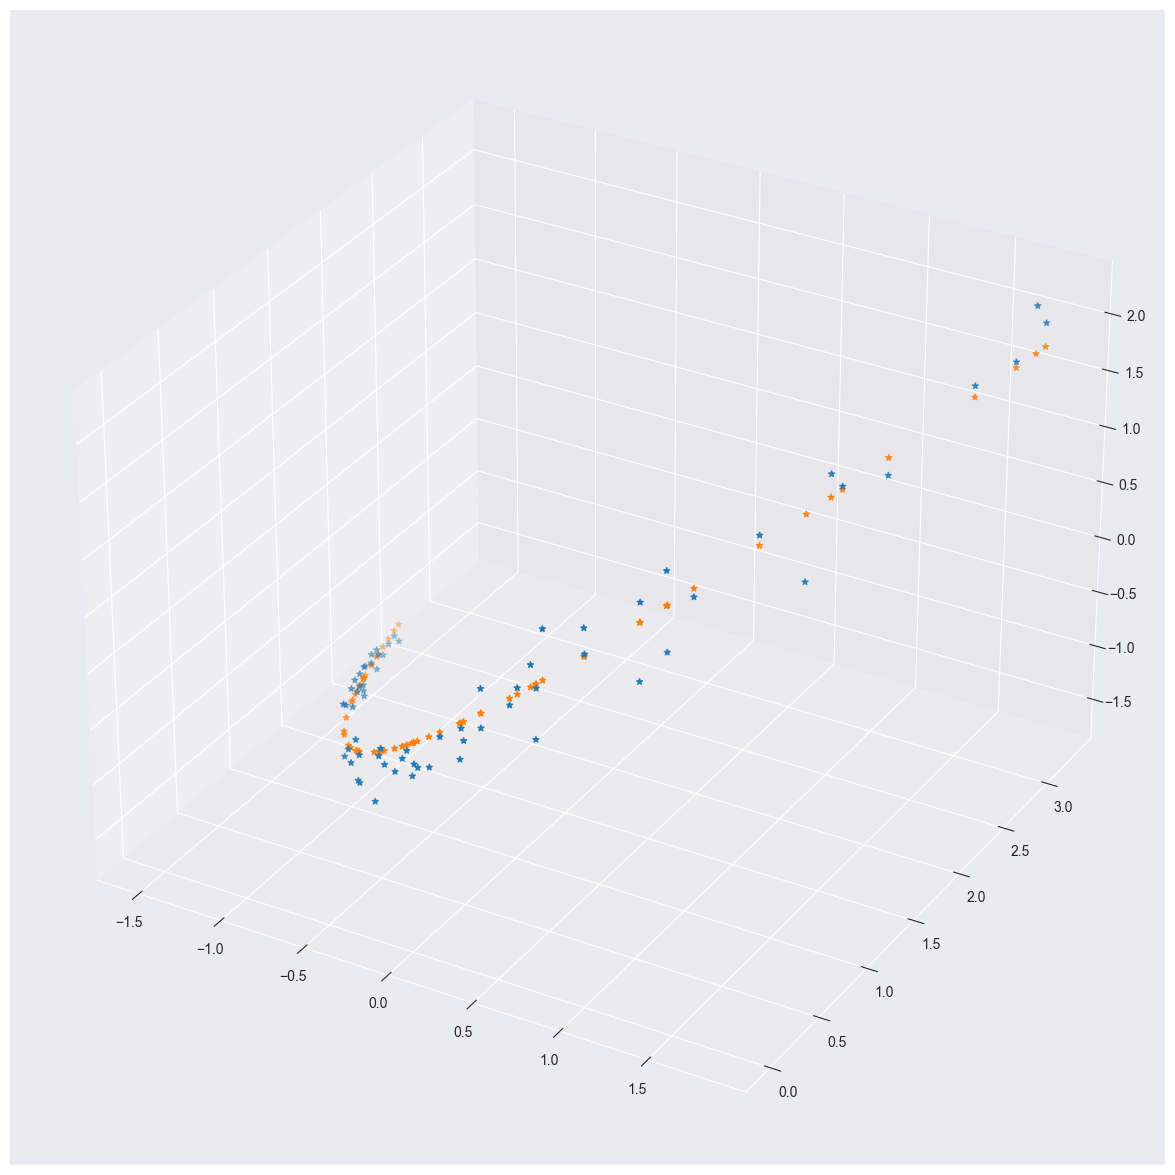

In [82]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x2_test[0], x2_test[1], y2_test, marker="*")
ax.scatter(x2_test[0], x2_test[1], new_line_y_pred, marker="*")
display()